# K-Nesrest Neighbor

KNN algorithm is one of the simplest classification algorithm and it is one of the most used learning algorithms. So what is the KNN algorithm? I’m glad you asked! KNN is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

### Understanding the Operation of KNN

When we say a technique is non-parametric , it means that it does not make any assumptions on the underlying data distribution. In other words, the model structure is determined from the data. If you think about it, it’s pretty useful, because in the “real world”, most of the data does not obey the typical theoretical assumptions made (as in linear regression models, for example). Therefore, KNN could and probably should be one of the first choices for a classification study when there is little or no prior knowledge about the distribution data.

#### Some pros and cons of KNN

Pros:

    No assumptions about data — useful, for example, for nonlinear data
    Simple algorithm — to explain and understand/interpret
    High accuracy (relatively) — it is pretty high but not competitive in comparison to better supervised learning models
    Versatile — useful for classification or regression

Cons:

    Computationally expensive — because the algorithm stores all of the training data
    High memory requirement
    Stores all (or almost all) of the training data
    Prediction stage might be slow (with big N)
    Sensitive to irrelevant features and the scale of the data

### Quick summary of KNN

The algorithm can be summarized as:

    A positive integer k is specified, along with a new sample
    We select the k entries in our database which are closest to the new sample
    We find the most common classification of these entries
    This is the classification we give to the new sample

A few other features of KNN:

    KNN stores the entire training dataset which it uses as its representation.
    KNN does not learn any model.
    KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.

**class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, kwargs)**


n_neighbors : int, optional (default = 5)

    Number of neighbors to use by default for kneighbors queries.
weights : str or callable, optional (default = ‘uniform’)

    weight function used in prediction. Possible values:

        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional

    Algorithm used to compute the nearest neighbors:

        ‘ball_tree’ will use BallTree
        ‘kd_tree’ will use KDTree
        ‘brute’ will use a brute-force search.
        ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

    Note: fitting on sparse input will override the setting of this parameter, using brute force.
leaf_size : int, optional (default = 30)

    Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
p : integer, optional (default = 2)

    Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
metric : string or callable, default ‘minkowski’

    the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.
metric_params : dict, optional (default = None)

    Additional keyword arguments for the metric function.
n_jobs : int or None, optional (default=None)

    The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.


In [28]:
import numpy as np
X = [[0], [1], [2], [3],[4],[5],[6],[7],[8],[9]]
y = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
probaU=np.unique(np.array(y))
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y) 
print("==============================================================")
print("Classification by Scikit Learn: ")
print("Classifier Result: ",neigh.predict([[1.1]]))
print("==============================================================")
prob=neigh.predict_proba([[1.1]])
print("Prediction Probability for Classification: ",prob)
print("Classification Manually: ")
mx=max(prob[0])
indmx=prob[0].tolist().index(mx)
print("Value will be classified as: ",probaU[indmx])
print("==============================================================")
print("Score of KNN for the Specified Data: ",neigh.score(X,y))
print("==============================================================")

Classification by Scikit Learn: 
Classifier Result:  [0]
Prediction Probability for Classification:  [[0.4 0.4 0.2 0.  0. ]]
Classification Manually: 
Value will be classified as:  0
Score of KNN for the Specified Data:  0.5


#### Available Methods

fit(self, X, y) ==> Fit the model using X as training data and y as target values

get_params(self[, deep]) ==> Get parameters for this estimator.

kneighbors(self[, X, n_neighbors, …]) ==> Finds the K-neighbors of a point.

kneighbors_graph(self[, X, n_neighbors, mode]) ==> Computes the (weighted) graph of k-Neighbors for points in X

predict(self, X) ==> Predict the class labels for the provided data

predict_proba(self, X) ==> Return probability estimates for the test data X.

score(self, X, y[, sample_weight]) ==> Returns the mean accuracy on the given test data and labels.

set_params(self, \*\*params) ==> Set the parameters of this estimator.

## Basic Implementation Without Scikit Learn

#### Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Accessing Data

     x   y
0   12  39
1   20  36
2   28  30
3   18  52
4   29  54
5   33  46
6   24  55
7   45  59
8   45  63
9   52  70
10  51  66
11  52  63
12  55  58
13  53  23
14  55  14
15  61   8
16  64  19
17  69   7
18  72  24
19  51  33
20  12  43
21  22  21
22  36   8
23  45  34
24  65  54
25  15  12
26  19  11
27  31  19
28  81  38
29  26  49


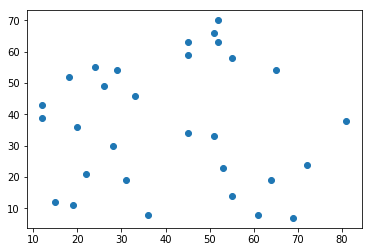

In [30]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72,51,12,22,36,45,65,15,19,31,81,26],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24,33,43,21,8,34,54,12,11,19,38,49]
})
print(df)
plt.scatter(df['x'],df['y'])

#### Creating & Assigning Centroid

In [44]:
np.random.seed(2)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
print(centroids)

{1: [40, 15], 2: [72, 22], 3: [43, 75]}


#### Plotting Data With Centroid

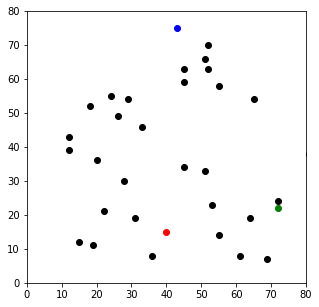

In [45]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

#### Centroid Assignment and Euclidian Distance Calculation

In [46]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head(df.shape[0]))

     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        36.878178        62.361847        47.507894        1     r
1   20  36        29.000000        53.851648        45.276926        1     r
2   28  30        19.209373        44.721360        47.434165        1     r
3   18  52        43.046487        61.773781        33.970576        3     b
4   29  54        40.521599        53.600373        25.238859        3     b
5   33  46        31.780497        45.793013        30.675723        3     b
6   24  55        43.081318        58.249464        27.586228        3     b
7   45  59        44.283180        45.803930        16.124515        3     b
8   45  63        48.259714        49.091751        12.165525        3     b
9   52  70        56.293872        52.000000        10.295630        3     b
10  51  66        52.172790        48.754487        12.041595        3     b
11  52  63        49.477268        45.617979        15.000000        3     b

#### Plotting Classifiers

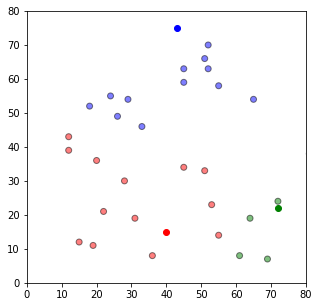

In [47]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## Implementation in Python

### Analysis of Diabetes Data using KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
diab = pd.read_csv("C:/Users/RUKHSUN/K-Nearest Neighbor/diabetes.csv")
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
cols=diab.columns.tolist()
print(cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [7]:
diab.shape

(768, 9)

##### Create a dataframe with all training data except the target column

In [8]:
X = diab.drop(columns=["Outcome"])

#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


#### Correlation

In [9]:
corel=diab.corr()

In [10]:
corel

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
OutcomeCorr=np.array(corel.iloc[corel.shape[0]-1].tolist()[:-1])
OutcomeVar=np.array(corel.columns.tolist()[:-1])
print(OutcomeCorr)
print(OutcomeVar)


[0.22189815 0.4665814  0.06506836 0.07475223 0.13054795 0.29269466
 0.17384407 0.23835598]
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


##### Heatmap

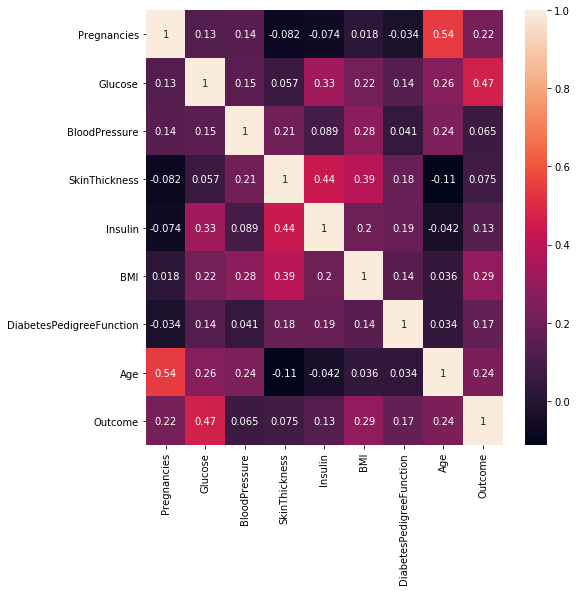

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(diab.corr(),annot=True)

C:\Users\comp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


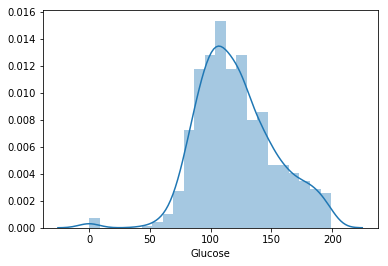

In [67]:
sns.distplot(diab[OutcomeVar[1]])

##### Separate target values

In [70]:
y = diab["Outcome"].values

##### View target values

In [71]:
print(y[0:5])

[1 0 1 0 1]


#### Train Test Split

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print(len(diab))
print(len(X_train))
print("Tain Data: %0.2f"%(len(X_train)/len(diab)*100)+"%")
X_train[:10].head()

768
614
Tain Data: 79.95%


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
304,3,150,76,0,0,21.0,0.207,37
297,0,126,84,29,215,30.7,0.520,24
522,6,114,0,0,0,0.0,0.189,26
618,9,112,82,24,0,28.2,1.282,50
501,3,84,72,32,0,37.2,0.267,28


#### Tranining the Model

In [96]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Show first 5 model predictions on the test data

In [97]:
knn.predict(X_test)[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

#### Check accuracy of our model on the test data

In [98]:
knn.score(X_test, y_test)

0.6883116883116883

#### Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[96, 12],
       [12, 34]], dtype=int64)

#### Considering confusion matrix above:

True negative = arr[0,0]

False positive = arr[0,1]

True postive = arr[1,0]

Fasle negative = arr[1,1]


#### CrossTab for Original vs Predicted

In [105]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,96,12,108
1,12,34,46
All,108,46,154


### Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.


In [106]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.68181818 0.69480519 0.75324675 0.75163399 0.68627451]
cv_scores mean:0.7135557253204311


In [29]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.


#### Maximum number of Neighbor that can be taken

In [30]:
knn_gscv.best_params_

{'n_neighbors': 14}

#### Best Score

In [31]:
knn_gscv.best_score_

0.7578125